In [4]:
!pip install opencv-python

     ---------------------------------------- 38.6/38.6 MB 3.0 MB/s eta 0:00:00


In [1]:
import cv2

In [2]:
import os
import json
import pandas as pd

In [5]:
with open('s1.json','r') as json_file:
    data=json.load(json_file)
    annotations=data.get('shapes',[])

In [9]:
labels = []
points = []
for annotation in annotations:
    label = annotation.get('label', '')
    points_data = annotation.get('points', [])
    
    labels.append(label)
    points.append(points_data)

In [11]:
df = pd.DataFrame({'Label': labels, 'Points': points})


In [17]:
df.iloc[0]['Points']

[[274.99367088607596, 278.4810126582278],
 [678.7911392405063, 754.4303797468355]]

In [27]:
df['Points'].apply(coordinates)

0     (274.99367088607596, 678.7911392405063, 278.48...
1     (697.7784810126582, 791.4493670886077, 615.189...
2     (572.4620253164558, 650.9430379746834, 796.202...
3     (342.0822784810126, 542.0822784810127, 889.873...
4     (433.2215189873418, 771.1962025316457, 1077.21...
5     (791.4493670886077, 915.5, 1077.2151898734178,...
6     (15.5, 173.72784810126586, 812.6582278481012, ...
7     (25.62658227848101, 134.48734177215192, 670.88...
8     (6.639240506329088, 159.80379746835445, 489.87...
9     (71.19620253164555, 242.08227848101262, 79.746...
10    (247.14556962025313, 359.80379746835445, 26.58...
11    (390.1835443037975, 506.6392405063291, 22.7848...
12    (621.8291139240507, 702.8417721518988, 13.9240...
13    (771.1962025316457, 919.2974683544303, 122.784...
14    (838.2848101265822, 906.6392405063291, 311.392...
15    (797.7784810126582, 923.0949367088608, 405.063...
Name: Points, dtype: object

In [22]:
def coordinates(s):
    x1=s[0][0]
    x2=s[0][1]
    y1=s[1][0]
    y2=s[1][1]
    
    return x1,y1,x2,y2

In [28]:
def extract_values(row):
    return pd.Series([value for sublist in row for value in sublist])

# Apply the function to create new columns
df_new = df['Points'].apply(extract_values)

In [33]:
data=pd.concat([df_new,df],axis=1)

In [36]:
data.drop(columns=['Points'],inplace=True)

In [37]:
data

,0,1,2,3,Label
0,274.993671,278.481013,678.791139,754.430380,mythological creature
1,697.778481,615.189873,791.449367,1045.569620,mythological creature
2,572.462025,796.202532,650.943038,1032.911392,mythological creature
3,342.082278,889.873418,542.082278,1056.962025,animal
4,433.221519,1077.215190,771.196203,1192.405063,animal
5,791.449367,1077.215190,915.500000,1182.278481,animal
6,15.500000,812.658228,173.727848,1192.405063,mythological creature
7,25.626582,670.886076,134.487342,763.291139,animal
8,6.639241,489.873418,159.803797,660.759494,mythological creature
9,71.196203,79.746835,242.082278,282.278481,mythological creature


In [43]:
def extract_roi(image, bounding_box):
    x1, y1 = map(int, bounding_box[0])
    x2, y2 = map(int, bounding_box[1])
    roi = image[y1:y2, x1:x2]
    return roi

def extract_rgb_values(roi):
    rgb_values = roi.reshape(-1, 3) 
    return rgb_values.flatten()

features = [] 
labels1 = [] 

In [44]:
image=cv2.imread('s1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [45]:
for annotation in annotations:
    label = annotation['label']
    bounding_box = annotation['points']

    roi = extract_roi(image, bounding_box)
    rgb_values = extract_rgb_values(roi)

    features.append(rgb_values)
    labels1.append(label)

In [56]:
features
#normalize these values

[array([211, 189,  88, ..., 191, 214, 162], dtype=uint8),
 array([198, 219, 178, ...,  61,  71,  63], dtype=uint8),
 array([218, 230, 190, ..., 191, 210, 155], dtype=uint8),
 array([61, 47, 62, ..., 99, 59, 67], dtype=uint8),
 array([205, 217, 177, ...,  58,  56,  70], dtype=uint8),
 array([220, 230, 206, ..., 211, 222, 190], dtype=uint8),
 array([178,  88,  80, ..., 193, 211, 161], dtype=uint8),
 array([233, 228, 186, ..., 208, 146, 125], dtype=uint8),
 array([103,  95,  76, ..., 223, 213, 102], dtype=uint8),
 array([225, 216, 185, ..., 250, 235, 178], dtype=uint8),
 array([216, 211, 155, ..., 221, 216, 160], dtype=uint8),
 array([220, 213, 141, ..., 116,  64,  66], dtype=uint8),
 array([227, 225, 176, ...,  50,  48,  51], dtype=uint8),
 array([217, 207, 145, ..., 228, 224, 187], dtype=uint8),
 array([ 41,  42,  46, ..., 228, 224, 177], dtype=uint8),
 array([119, 165, 242, ...,  58,  58,  66], dtype=uint8)]

In [48]:
data

,0,1,2,3,Label
0,274.993671,278.481013,678.791139,754.430380,mythological creature
1,697.778481,615.189873,791.449367,1045.569620,mythological creature
2,572.462025,796.202532,650.943038,1032.911392,mythological creature
3,342.082278,889.873418,542.082278,1056.962025,animal
4,433.221519,1077.215190,771.196203,1192.405063,animal
5,791.449367,1077.215190,915.500000,1182.278481,animal
6,15.500000,812.658228,173.727848,1192.405063,mythological creature
7,25.626582,670.886076,134.487342,763.291139,animal
8,6.639241,489.873418,159.803797,660.759494,mythological creature
9,71.196203,79.746835,242.082278,282.278481,mythological creature


In [55]:
for arr in features:
    print(len(arr))

576912
121260
55224
100200
116610
39060
180120
30411
78489
104139
52080
69600
52002
77700
17748
88830


In [1]:
#2d array into 1d array by flatten. size depends on the no. of pixels in each image.

In [12]:
def extract_roi(image, bounding_box):
    x1, y1 = map(int, bounding_box[0])
    x2, y2 = map(int, bounding_box[1])
    roi = image[y1:y2, x1:x2]
    return roi

def extract_rgb_values(roi):
    rgb_values = roi.reshape(-1, 3) 
    return rgb_values.flatten()

features = [] 
labels1 = [] 

In [14]:
import os
import json

# Specify the root directory of your folder structure
root_directory = r'C:\Users\acer\OneDrive\Desktop\folk_art_image'

# Loop through each subfolder (s1 to s13)
for subfolder in range(1, 14):
    subfolder_name = f's{subfolder}'

    # Path to the current subfolder
    subfolder_path = os.path.join(root_directory, subfolder_name)

    # Loop through each file in the subfolder
    for filename in os.listdir(subfolder_path):
        # Check if the file is a JSON file
        if filename.endswith('.json'):
            json_filepath = os.path.join(subfolder_path, filename)

            # Read the JSON file
            with open(json_filepath, 'r') as json_file:
                json_data = json.load(json_file)
                annotations = json_data.get('shapes', [])

            # Load and process the image
            image = cv2.imread(f'{subfolder_name}.img')
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Process each annotation
            for annotation in annotations:
                label = annotation['label']
                bounding_box = annotation['points']

                roi = extract_roi(image, bounding_box)
                rgb_values = extract_rgb_values(roi)

                features.append(rgb_values)
                labels1.append(label)



TypeError: 'NoneType' object is not subscriptable

In [9]:
for subfolder in range(1, 14):
    subfolder_name = f's{subfolder}'
    print(f'{subfolder_name}.img')

s1.img
s2.img
s3.img
s4.img
s5.img
s6.img
s7.img
s8.img
s9.img
s10.img
s11.img
s12.img
s13.img


In [19]:
import os
import cv2
import json

# Assuming you have the extract_roi and extract_rgb_values functions defined
def extract_roi(image, bounding_box):
    x1, y1 = map(int, bounding_box[0])
    x2, y2 = map(int, bounding_box[1])
    roi = image[y1:y2, x1:x2]
    return roi

def extract_rgb_values(roi):
    rgb_values = roi.reshape(-1, 3) 
    return rgb_values.flatten()

# Assuming you have the features and labels1 variables declared
features = []
labels1 = []

# Specify the root directory of your folder structure
root_directory = r'C:\Users\acer\OneDrive\Desktop\folk_art_image'
folder_name = 's1'

# Construct the folder path
folder_path = os.path.join(root_directory, folder_name)

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a JPG file
    if filename.endswith('.jpg'):
        # Construct the file paths for the JPG and JSON files
        jpg_filepath = os.path.join(folder_path, filename)
        json_filepath = os.path.join(folder_path, f"{filename.split('.')[0]}.json")

        # Check if the corresponding JSON file exists
        if os.path.exists(json_filepath):
            # Read the JSON file
            with open(json_filepath, 'r') as json_file:
                data = json.load(json_file)
                annotations = data.get('shapes', [])

            # Load and process the image
            image = cv2.imread(jpg_filepath)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Process each annotation
            for annotation in annotations:
                label = annotation['label']
                bounding_box = annotation['points']

                roi = extract_roi(image, bounding_box)
                rgb_values = extract_rgb_values(roi)

                features.append(rgb_values)
                labels1.append(label)



In [ ]:
df = pd.DataFrame({
    'labels': labels1,
    'features': features
})
df

In [33]:
df

,labels,features
0,mythological creature,"[211, 189, 88, 222, 201, 96, 214, 193, 88, 214..."
1,mythological creature,"[198, 219, 178, 190, 212, 165, 188, 211, 157, ..."
2,mythological creature,"[218, 230, 190, 189, 202, 158, 204, 220, 173, ..."
3,animal,"[61, 47, 62, 65, 56, 51, 119, 81, 78, 58, 50, ..."
4,animal,"[205, 217, 177, 207, 219, 179, 208, 220, 180, ..."
5,animal,"[220, 230, 206, 218, 227, 206, 222, 232, 208, ..."
6,mythological creature,"[178, 88, 80, 233, 213, 188, 255, 241, 210, 17..."
7,animal,"[233, 228, 186, 234, 229, 187, 235, 230, 188, ..."
8,mythological creature,"[103, 95, 76, 230, 221, 154, 234, 230, 159, 23..."
9,mythological creature,"[225, 216, 185, 224, 217, 163, 223, 216, 162, ..."


In [34]:
import os
import cv2
import json

# Assuming you have the extract_roi and extract_rgb_values functions defined
def extract_roi(image, bounding_box):
    x1, y1 = map(int, bounding_box[0])
    x2, y2 = map(int, bounding_box[1])
    roi = image[y1:y2, x1:x2]
    return roi

def extract_rgb_values(roi):
    rgb_values = roi.reshape(-1, 3) 
    return rgb_values.flatten()

# Assuming you have the features and labels1 variables declared
features = []
labels1 = []

# Specify the root directory of your folder structure
root_directory = r'C:\Users\acer\OneDrive\Desktop\folk_art_image'
folder_name = 's2'

# Construct the folder path
folder_path = os.path.join(root_directory, folder_name)

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a JPG file
    if filename.endswith('.jpg'):
        # Construct the file paths for the JPG and JSON files
        jpg_filepath = os.path.join(folder_path, filename)
        json_filepath = os.path.join(folder_path, f"{filename.split('.')[0]}.json")

        # Check if the corresponding JSON file exists
        if os.path.exists(json_filepath):
            # Read the JSON file
            with open(json_filepath, 'r') as json_file:
                data = json.load(json_file)
                annotations = data.get('shapes', [])

            # Load and process the image
            image = cv2.imread(jpg_filepath)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Process each annotation
            for annotation in annotations:
                label = annotation['label']
                bounding_box = annotation['points']

                roi = extract_roi(image, bounding_box)
                rgb_values = extract_rgb_values(roi)

                features.append(rgb_values)
                labels1.append(label)



In [1]:
import os
import cv2
import json
import pandas as pd
import numpy as np

# Assuming you have the extract_roi and extract_rgb_values functions defined
def extract_roi(image, bounding_box):
    x1, y1 = map(int, bounding_box[0])
    x2, y2 = map(int, bounding_box[1])
    roi = image[y1:y2, x1:x2]
    return roi

def extract_rgb_values(roi):
    rgb_values = roi.reshape(-1, 3) 
    return rgb_values.flatten()

# Assuming you have the features and labels1 variables declared
all_features = []
all_labels = []

# Specify the root directory of your folder structure
root_directory = r'C:\Users\acer\OneDrive\Desktop\folk_art_image'

# Loop through each folder (s1 to s13)
for subfolder in range(1, 14):
    folder_name = f's{subfolder}'
    folder_path = os.path.join(root_directory, folder_name)

    # Assuming you have the features and labels1 variables declared within the loop
    features = []
    labels1 = []

    # Loop through each file in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a JPG file
        if filename.endswith('.jpg'):
            # Construct the file paths for the JPG and JSON files
            jpg_filepath = os.path.join(folder_path, filename)
            json_filepath = os.path.join(folder_path, f"{filename.split('.')[0]}.json")

            # Check if the corresponding JSON file exists
            if os.path.exists(json_filepath):
                # Read the JSON file
                with open(json_filepath, 'r') as json_file:
                    data = json.load(json_file)
                    annotations = data.get('shapes', [])

                # Load and process the image
                image = cv2.imread(jpg_filepath)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Process each annotation
                for annotation in annotations:
                    label = annotation['label']
                    bounding_box = annotation['points']

                    roi = extract_roi(image, bounding_box)
                    rgb_values = extract_rgb_values(roi)

                    features.append(rgb_values)
                    labels1.append(label)

    # Append the features and labels for the current folder to the overall lists
    all_features.extend(features)
    all_labels.extend(labels1)

# Create a DataFrame for all folders
df = pd.DataFrame({
    'labels': all_labels,
    'features': all_features
})


In [40]:
animal_df=df[df['labels']=='animal']

In [41]:
animal_df

,labels,features
3,animal,"[61, 47, 62, 65, 56, 51, 119, 81, 78, 58, 50, ..."
4,animal,"[205, 217, 177, 207, 219, 179, 208, 220, 180, ..."
5,animal,"[220, 230, 206, 218, 227, 206, 222, 232, 208, ..."
7,animal,"[233, 228, 186, 234, 229, 187, 235, 230, 188, ..."
15,animal,"[119, 165, 242, 119, 166, 236, 124, 172, 238, ..."
...,...,...
166,animal,"[7, 9, 21, 10, 8, 19, 6, 2, 16, 4, 0, 12, 6, 0..."
178,animal,"[242, 209, 42, 236, 203, 38, 232, 199, 36, 231..."
206,animal,"[0, 0, 7, 1, 2, 6, 0, 0, 2, 3, 4, 6, 0, 3, 9, ..."
211,animal,"[135, 187, 235, 134, 186, 234, 135, 187, 235, ..."


In [50]:
animal_df=animal_df.reset_index(drop=True)

In [52]:

max_length = animal_df['features'].apply(len).max()

# Create a new DataFrame with columns for each value in the lists
new_columns = [f'feature_{i+1}' for i in range(max_length)]
new_df = pd.DataFrame(animal_df['features'].to_list(), columns=new_columns)

# Concatenate the new DataFrame with the 'label' column from the original DataFrame
result_df = pd.concat([animal_df['labels'], new_df], axis=1)

# Fill NaN values with 0
result_df = result_df.fillna(0)


In [53]:
result_df

,labels,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1092987,feature_1092988,feature_1092989,feature_1092990,feature_1092991,feature_1092992,feature_1092993,feature_1092994,feature_1092995,feature_1092996
0,animal,61,47,62,65,56,51,119,81,78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,animal,205,217,177,207,219,179,208,220,180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,animal,220,230,206,218,227,206,222,232,208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,animal,233,228,186,234,229,187,235,230,188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,animal,119,165,242,119,166,236,124,172,238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,animal,7,9,21,10,8,19,6,2,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,animal,242,209,42,236,203,38,232,199,36,...,38.0,21.0,31.0,41.0,16.0,12.0,13.0,46.0,32.0,31.0
64,animal,0,0,7,1,2,6,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,animal,135,187,235,134,186,234,135,187,235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
result_df.to_csv('animals.csv', index=False)

### classification


In [3]:
def transform_label(s):
    if s!="animal":
        return "not animal"
    else:
        return "animal"

In [5]:
df['transformed_labels']=df['labels'].apply(transform_label)

In [6]:
df

,labels,features,transformed_labels
0,mythological creature,"[211, 189, 88, 222, 201, 96, 214, 193, 88, 214...",not animal
1,mythological creature,"[198, 219, 178, 190, 212, 165, 188, 211, 157, ...",not animal
2,mythological creature,"[218, 230, 190, 189, 202, 158, 204, 220, 173, ...",not animal
3,animal,"[61, 47, 62, 65, 56, 51, 119, 81, 78, 58, 50, ...",animal
4,animal,"[205, 217, 177, 207, 219, 179, 208, 220, 180, ...",animal
...,...,...,...
208,mythological creature,"[27, 10, 16, 61, 20, 34, 125, 57, 78, 189, 95,...",not animal
209,tree,"[1, 0, 6, 1, 0, 6, 1, 0, 5, 1, 0, 5, 1, 0, 5, ...",not animal
210,mythological creature,"[137, 177, 228, 140, 182, 232, 143, 187, 236, ...",not animal
211,animal,"[135, 187, 235, 134, 186, 234, 135, 187, 235, ...",animal


In [7]:
max_length = df['features'].apply(len).max()

# Create a new DataFrame with columns for each value in the lists
new_columns = [f'feature_{i+1}' for i in range(max_length)]
new_df = pd.DataFrame(df['features'].to_list(), columns=new_columns)

# Concatenate the new DataFrame with the 'label' column from the original DataFrame
result_df = pd.concat([df['transformed_labels'], new_df], axis=1)

# Fill NaN values with 0
result_df = result_df.fillna(0)

In [8]:
result_df

,transformed_labels,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1554891,feature_1554892,feature_1554893,feature_1554894,feature_1554895,feature_1554896,feature_1554897,feature_1554898,feature_1554899,feature_1554900
0,not animal,211,189,88,222,201,96,214,193,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,not animal,198,219,178,190,212,165,188,211,157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,not animal,218,230,190,189,202,158,204,220,173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,animal,61,47,62,65,56,51,119,81,78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,animal,205,217,177,207,219,179,208,220,180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,not animal,27,10,16,61,20,34,125,57,78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,not animal,1,0,6,1,0,6,1,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,not animal,137,177,228,140,182,232,143,187,236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,animal,135,187,235,134,186,234,135,187,235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = result_df.drop(columns=['transformed_labels']) 
y = result_df['transformed_labels']  

print(X)
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test features using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

     feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0          211        189         88        222        201         96   
1          198        219        178        190        212        165   
2          218        230        190        189        202        158   
3           61         47         62         65         56         51   
4          205        217        177        207        219        179   
..         ...        ...        ...        ...        ...        ...   
208         27         10         16         61         20         34   
209          1          0          6          1          0          6   
210        137        177        228        140        182        232   
211        135        187        235        134        186        234   
212         12        131         91          8        141         96   

     feature_7  feature_8  feature_9  feature_10  ...  feature_1554891  \
0          214        193         88         214 

In [13]:
X_train_scaled

array([[-1.72878018, -1.12179351, -1.36665549, ..., -0.07692308,
        -0.07692308, -0.07692308],
       [ 0.52059599, -1.68584637, -1.30759443, ..., -0.07692308,
        -0.07692308, -0.07692308],
       [ 0.08106271,  0.88678497,  0.08034041, ..., -0.07692308,
        -0.07692308, -0.07692308],
       ...,
       [-0.13870393, -0.24132075, -0.15590382, ..., -0.07692308,
        -0.07692308, -0.07692308],
       [-1.4960861 , -1.39694125, -0.73174913, ..., -0.07692308,
        -0.07692308, -0.07692308],
       [ 0.37839404, -0.55774065, -0.37738278, ..., -0.07692308,
        -0.07692308, -0.07692308]])

In [4]:
for array in df['features']:
    print(len(array))

576912
121260
55224
100200
116610
39060
180120
30411
78489
104139
52080
69600
52002
77700
17748
88830
32391
92826
19224
249804
26892
27666
63813
28482
72450
302331
100548
472230
197760
198720
90870
82713
87822
96099
1110375
28737
68970
339660
1515360
165000
307980
320850
184464
35145
47724
61359
228528
66780
172872
487200
192444
755811
210018
68076
64449
51150
226353
122139
85275
10080
43824
481572
144480
207018
127224
643260
211422
86328
98766
114036
93912
21456
26910
24444
50778
33300
44352
47058
54531
289476
164160
172590
363636
266760
176280
393360
216216
228177
180075
381036
342258
383274
333504
68310
44100
373527
459264
353925
293562
663390
271170
512082
546264
473040
619740
644952
90288
402336
721230
472032
623040
602538
183918
312000
10431
14271
352800
99696
71136
297672
250920
144837
974073
337110
40368
201432
267900
57084
223260
153270
473373
480816
92547
232650
59904
192324
282183
113022
181662
225720
223668
64512
252495
336690
212868
93495
93771
88389
167049
126555
251544
2

### Annotators

In [1]:
import os
import cv2
import json
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw

# Assuming you have the extract_rgb_values function defined
def extract_rgb_values(roi):
    rgb_values = roi.reshape(-1, 3) 
    return rgb_values.flatten()

def extract_roi_from_polygon(image, polygon_points, target_width, target_height):
    polygon_points_tuples = [(x, y) for [x, y] in polygon_points]

    mask = Image.new('L', (image.shape[1], image.shape[0]), 0)
    ImageDraw.Draw(mask).polygon(polygon_points_tuples, outline=1, fill=1)
    mask = np.array(mask)
    roi = image * mask[:, :, np.newaxis]

    # Resize the bounding box array to the target resolution
    roi = cv2.resize(roi, (target_width, target_height), interpolation=cv2.INTER_AREA)
    
    return roi

# Function to extract ROI from polygon points
# def extract_roi_from_polygon(image, polygon_points):
#     # Convert list of lists to list of tuples
#     polygon_points_tuples = [(x, y) for [x, y] in polygon_points]

#     mask = Image.new('L', (image.shape[1], image.shape[0]), 0)
#     ImageDraw.Draw(mask).polygon(polygon_points_tuples, outline=1, fill=1)
#     mask = np.array(mask)
#     roi = image * mask[:, :, np.newaxis]
#     return roi

# Specify the root directory of your folder structure
root_directory = r'C:\Users\acer\OneDrive\Desktop\annotator\Task 2_Bhat'

# Initialize lists to store features, labels, and annotator names
all_features = []
all_labels = []
all_annotators = []

# Loop through each subfolder (s1 to s13) within the annotator folder
for subfolder in range(1, 14):
    folder_name = f's{subfolder}'
    folder_path = os.path.join(root_directory, folder_name)

    # Check if the folder exists
    if os.path.exists(folder_path):
        # Loop through each subfolder in the current subfolder (e.g., img)
        for sub_subfolder in os.listdir(folder_path):
            sub_subfolder_path = os.path.join(folder_path, sub_subfolder)

            # Check if the sub-subfolder is a directory
            if os.path.isdir(sub_subfolder_path):
                # Loop through each file in the sub-subfolder
                for filename in os.listdir(sub_subfolder_path):
                    # Check if the file is a JPG file
                    if filename.endswith('.jpg'):
                        # Construct the file paths for the JPG and JSON files
                        jpg_filepath = os.path.join(sub_subfolder_path, filename)
                        json_filepath = os.path.join(sub_subfolder_path, f"{filename.split('.')[0]}.json")

                        # Check if the corresponding JSON file exists
                        if os.path.exists(json_filepath):
                            # Read the JSON file
                            with open(json_filepath, 'r') as json_file:
                                data = json.load(json_file)
                                annotations = data.get('shapes', [])

                            # Load and process the image
                            image = cv2.imread(jpg_filepath)
                            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                            # Process each annotation
                            for annotation in annotations:
                                label = annotation['label']
                                polygon_points = annotation['points']

                                roi = extract_roi_from_polygon(image, polygon_points,100,100)
                                rgb_values = extract_rgb_values(roi)

                                all_features.append(rgb_values)
                                all_labels.append(label)
                                all_annotators.append(root_directory)  # Use root_directory as annotator name

# Create a DataFrame for all annotations
df1 = pd.DataFrame({
'labels': all_labels,
'features': all_features,
'annotator': all_annotators  # Add annotator column
})


In [32]:
14 in df['features'].iloc[0]

True

In [42]:
my_array=df['features'].iloc[0]

In [43]:
from collections import Counter
value_counts = Counter(my_array)

for value, count in value_counts.items():
    print(f"{value}: {count}")

0: 2787449
193: 3366
78: 3571
95: 3924
157: 1280
67: 4009
66: 4197
191: 3556
58: 4342
61: 4374
195: 3155
80: 3629
244: 2176
254: 1293
255: 7443
210: 2790
167: 1521
150: 1197
158: 1417
60: 4335
49: 3173
181: 2709
75: 3747
87: 4006
130: 1148
64: 4276
74: 3780
186: 3628
159: 1415
168: 1528
240: 2961
248: 1657
226: 1768
166: 1478
176: 1984
103: 2815
143: 1048
72: 3922
173: 1709
141: 1073
142: 1131
227: 1840
215: 2284
239: 2954
241: 2826
190: 3603
146: 1025
83: 3832
205: 2829
162: 1512
169: 1619
253: 1378
225: 1771
234: 2537
196: 2991
182: 2941
220: 1879
246: 1883
251: 1566
65: 4085
62: 4284
7: 90
82: 3757
85: 3837
136: 1081
135: 1036
151: 1192
245: 2074
212: 2562
203: 2808
131: 1145
128: 1215
111: 1979
201: 2819
171: 1653
232: 2174
222: 1809
223: 1761
229: 1910
48: 3170
51: 3529
6: 71
20: 362
32: 1011
94: 3873
101: 3047
104: 2592
194: 3328
199: 2800
224: 1710
233: 2295
237: 2971
40: 1963
43: 2437
52: 3687
126: 1238
133: 1164
89: 3959
206: 2825
198: 3008
121: 1415
113: 1759
180: 2450
123: 1

In [44]:
df

,labels,features,annotator
0,Mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
1,Mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
2,Mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
3,Animals,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
4,Animals,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
...,...,...,...
263,Human,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
264,Birds,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
265,Mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
266,Mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...


In [2]:
import os
import cv2
import json
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw

# Assuming you have the extract_rgb_values function defined
def extract_rgb_values(roi):
    rgb_values = roi.reshape(-1, 3) 
    return rgb_values.flatten()


def extract_roi_from_polygon(image, polygon_points, target_width, target_height):
    polygon_points_tuples = [(x, y) for [x, y] in polygon_points]

    mask = Image.new('L', (image.shape[1], image.shape[0]), 0)
    ImageDraw.Draw(mask).polygon(polygon_points_tuples, outline=1, fill=1)
    mask = np.array(mask)
    roi = image * mask[:, :, np.newaxis]

    # Resize the bounding box array to the target resolution
    roi = cv2.resize(roi, (target_width, target_height), interpolation=cv2.INTER_AREA)
    
    return roi
# Function to extract ROI from polygon points
# def extract_roi_from_polygon(image, polygon_points):
#     # Convert list of lists to list of tuples
#     polygon_points_tuples = [(x, y) for [x, y] in polygon_points]

#     mask = Image.new('L', (image.shape[1], image.shape[0]), 0)
#     ImageDraw.Draw(mask).polygon(polygon_points_tuples, outline=1, fill=1)
#     mask = np.array(mask)
#     roi = image * mask[:, :, np.newaxis]
#     return roi

# Specify the root directory of your folder structure
root_directory = r'C:\Users\acer\OneDrive\Desktop\annotator\shuja_t2'

# Initialize lists to store features, labels, and annotator names
all_features = []
all_labels = []
all_annotators = []

# Loop through each subfolder (s1 to s13) within the annotator folder
for subfolder in range(1, 14):
    folder_name = f's{subfolder}'
    folder_path = os.path.join(root_directory, folder_name)

    # Check if the folder exists
    if os.path.exists(folder_path):
        # Loop through each subfolder in the current subfolder (e.g., img)
        for sub_subfolder in os.listdir(folder_path):
            sub_subfolder_path = os.path.join(folder_path, sub_subfolder)

            # Check if the sub-subfolder is a directory
            if os.path.isdir(sub_subfolder_path):
                # Loop through each file in the sub-subfolder
                for filename in os.listdir(sub_subfolder_path):
                    # Check if the file is a JPG file
                    if filename.endswith('.jpg'):
                        # Construct the file paths for the JPG and JSON files
                        jpg_filepath = os.path.join(sub_subfolder_path, filename)
                        json_filepath = os.path.join(sub_subfolder_path, f"{filename.split('.')[0]}.json")

                        # Check if the corresponding JSON file exists
                        if os.path.exists(json_filepath):
                            # Read the JSON file
                            with open(json_filepath, 'r') as json_file:
                                data = json.load(json_file)
                                annotations = data.get('shapes', [])

                            # Load and process the image
                            image = cv2.imread(jpg_filepath)
                            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                            # Process each annotation
                            for annotation in annotations:
                                label = annotation['label']
                                polygon_points = annotation['points']

                                roi = extract_roi_from_polygon(image, polygon_points,100,100)
                                rgb_values = extract_rgb_values(roi)

                                all_features.append(rgb_values)
                                all_labels.append(label)
                                all_annotators.append(root_directory)  # Use root_directory as annotator name

# Create a DataFrame for all annotations
df2 = pd.DataFrame({
'labels': all_labels,
'features': all_features,
'annotator': all_annotators  # Add annotator column
})


In [47]:
df

,labels,features,annotator
0,mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\shuja_t2
1,mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\shuja_t2
2,mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\shuja_t2
3,mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\shuja_t2
4,mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\shuja_t2
...,...,...,...
758,tree,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\shuja_t2
759,tree,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\shuja_t2
760,tree,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\shuja_t2
761,human,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\shuja_t2


In [3]:
import os
import cv2
import json
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw

# Assuming you have the extract_rgb_values function defined
def extract_rgb_values(roi):
    rgb_values = roi.reshape(-1, 3) 
    return rgb_values.flatten()


def extract_roi_from_polygon(image, polygon_points, target_width, target_height):
    polygon_points_tuples = [(x, y) for [x, y] in polygon_points]

    mask = Image.new('L', (image.shape[1], image.shape[0]), 0)
    ImageDraw.Draw(mask).polygon(polygon_points_tuples, outline=1, fill=1)
    mask = np.array(mask)
    roi = image * mask[:, :, np.newaxis]

    # Resize the bounding box array to the target resolution
    roi = cv2.resize(roi, (target_width, target_height), interpolation=cv2.INTER_AREA)
    
    return roi
# Function to extract ROI from polygon points
# def extract_roi_from_polygon(image, polygon_points):
#     # Convert list of lists to list of tuples
#     polygon_points_tuples = [(x, y) for [x, y] in polygon_points]

#     mask = Image.new('L', (image.shape[1], image.shape[0]), 0)
#     ImageDraw.Draw(mask).polygon(polygon_points_tuples, outline=1, fill=1)
#     mask = np.array(mask)
#     roi = image * mask[:, :, np.newaxis]
#     return roi
root_directory = r'C:\Users\acer\OneDrive\Desktop\annotator\Solution_Assignment_1_Task_2'

# Initialize lists to store features, labels, and annotator names
all_features = []
all_labels = []
all_annotators = []

# Loop through each subfolder (s1 to s13) within the annotator folder
for subfolder in range(1, 14):
    folder_name = f's{subfolder}'
    folder_path = os.path.join(root_directory, folder_name)

    # Check if the folder exists
    if os.path.exists(folder_path):
        # Loop through each file in the folder
        for filename in os.listdir(folder_path):
            # Check if the file is a JPG file
            if filename.endswith('.jpg'):
                # Construct the file paths for the JPG and JSON files
                jpg_filepath = os.path.join(folder_path, filename)
                json_filepath = os.path.join(folder_path, f"{filename.split('.')[0]}.json")

                # Check if the corresponding JSON file exists
                if os.path.exists(json_filepath):
                    # Read the JSON file
                    with open(json_filepath, 'r') as json_file:
                        data = json.load(json_file)
                        annotations = data.get('shapes', [])

                    # Load and process the image
                    image = cv2.imread(jpg_filepath)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                    # Process each annotation
                    for annotation in annotations:
                        label = annotation['label']
                        polygon_points = annotation['points']

                        roi = extract_roi_from_polygon(image, polygon_points,100,100)
                        rgb_values = extract_rgb_values(roi)

                        all_features.append(rgb_values)
                        all_labels.append(label)
                        all_annotators.append(root_directory)  # Use root_directory as annotator name

# Create a DataFrame for all annotations
df3 = pd.DataFrame({
    'labels': all_labels,
    'features': all_features,
    'annotator': all_annotators  # Add annotator column
})

In [49]:
df1

,labels,features,annotator
0,mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Solut...
1,mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Solut...
2,mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Solut...
3,animals,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Solut...
4,mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Solut...
...,...,...,...
802,background,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Solut...
803,background,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Solut...
804,background,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Solut...
805,background,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Solut...


In [4]:
import os
import cv2
import json
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw

# Assuming you have the extract_rgb_values function defined
def extract_rgb_values(roi):
    rgb_values = roi.reshape(-1, 3) 
    return rgb_values.flatten()

def extract_roi_from_polygon(image, polygon_points, target_width, target_height):
    polygon_points_tuples = [(x, y) for [x, y] in polygon_points]

    mask = Image.new('L', (image.shape[1], image.shape[0]), 0)
    ImageDraw.Draw(mask).polygon(polygon_points_tuples, outline=1, fill=1)
    mask = np.array(mask)
    roi = image * mask[:, :, np.newaxis]

    # Resize the bounding box array to the target resolution
    roi = cv2.resize(roi, (target_width, target_height), interpolation=cv2.INTER_AREA)
    
    return roi

# Function to extract ROI from polygon points
# def extract_roi_from_polygon(image, polygon_points):
#     # Convert list of lists to list of tuples
#     polygon_points_tuples = [(x, y) for [x, y] in polygon_points]

#     mask = Image.new('L', (image.shape[1], image.shape[0]), 0)
#     ImageDraw.Draw(mask).polygon(polygon_points_tuples, outline=1, fill=1)
#     mask = np.array(mask)
#     roi = image * mask[:, :, np.newaxis]
#     return roi
root_directory = r'C:\Users\acer\OneDrive\Desktop\annotator\Task 2_Ramchandani'

# Initialize lists to store features, labels, and annotator names
all_features = []
all_labels = []
all_annotators = []
# image_number=[]
# Loop through each subfolder (s1 to s13) within the annotator folder
# for subfolder in range(1, 14):
#     folder_name = f's{subfolder}'
for subfolder in range(1, 14):
    folder_name = str(subfolder)
    folder_path = os.path.join(root_directory, folder_name)

    # Check if the folder exists
    if os.path.exists(folder_path):
        # Loop through each file in the folder
        for filename in os.listdir(folder_path):
            # Check if the file is a JPG file
            if filename.endswith('.jpg'):
                # Construct the file paths for the JPG and JSON files
                jpg_filepath = os.path.join(folder_path, filename)
                json_filepath = os.path.join(folder_path, f"{filename.split('.')[0]}.json")

                # Check if the corresponding JSON file exists
                if os.path.exists(json_filepath):
                    # Read the JSON file
                    with open(json_filepath, 'r') as json_file:
                        data = json.load(json_file)
                        annotations = data.get('shapes', [])

                    # Load and process the image
                    image = cv2.imread(jpg_filepath)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                    # Process each annotation
                    for annotation in annotations:
                        label = annotation['label']
                        polygon_points = annotation['points']
                        
                        roi = extract_roi_from_polygon(image, polygon_points,100,100)
                        rgb_values = extract_rgb_values(roi)

                        all_features.append(rgb_values)
                        all_labels.append(label)
                        all_annotators.append(root_directory)  # Use root_directory as annotator name
#                         image_number.append(annotation['imagePath'])
# Create a DataFrame for all annotations
df4 = pd.DataFrame({
    'labels': all_labels,
    'features': all_features,
    'annotator': all_annotators  # Add annotator column
})

In [5]:
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [6]:
combined_df

,labels,features,annotator
0,Mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
1,Mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
2,Mythological characters,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
3,Animals,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
4,Animals,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
...,...,...,...
2659,tree,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
2660,tree,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
2661,tree,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...
2662,human,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",C:\Users\acer\OneDrive\Desktop\annotator\Task ...


In [62]:
combined_df['features'].iloc[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [63]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [64]:
max_length = combined_df['features'].apply(len).max()

# Pad sequences to make them all the same length
padded_sequences = pad_sequences(combined_df['features'], maxlen=max_length, padding='post', value=-1)

# Create a DataFrame from the padded sequences
padded_df = pd.DataFrame(padded_sequences, columns=[f'feature_{i+1}' for i in range(max_length)])

# Concatenate the padded DataFrame with other columns from the original DataFrame
combined_df = pd.concat([combined_df['labels'], padded_df], axis=1)

MemoryError: Unable to allocate 34.0 GiB for an array with shape (2664, 3427200) and data type int32

In [65]:
max_length = combined_df['features'].apply(len).max()

# Create a new DataFrame with columns for each value in the lists
new_columns = [f'feature_{i+1}' for i in range(max_length)]
new_df = pd.DataFrame(combined_df['features'].to_list(), columns=new_columns)

# Pad missing values with -1
new_df = new_df.fillna(-1)

# Concatenate the new DataFrame with other columns from the original DataFrame
combined_df = pd.concat([combined_df['labels'], new_df], axis=1)

MemoryError: 

In [8]:
existing_dimensions = combined_df['features'].apply(lambda x: x.shape[:2])
print("Existing dimensions:", existing_dimensions.unique())

Existing dimensions: [(3351600,) (2548800,) (2898000,) (3276000,) (3427200,) (2880000,)
 (2239200,) (3297600,) (2084400,) (2646000,) (3326400,) (2610000,)
 (2484000,) (1681200,) (1663200,) (1692000,) (1652400,) (2178000,)
 (3247200,) (2721600,) (2811600,) (2764800,) (1739520,) (2544534,)
 (1724460,) (1496880,) (1622628,) (1716711,) (1692288,) (2719368,)
 (1463616,) (1687764,) (2031615,) (2550900,) (1976400,) (2072658,)
 (2255328,) (2318661,) (1933200,) (2468130,) (2021823,) (2394357,)
 (1789548,) (2548572,) (2170800,) (1954800,) (1479600,) (2019600,)
 (1674000,) (2188800,) (2476050,) (1451919,) (1735968,) (2104128,)
 (2293608,) (2708559,) (1648656,) (1155150,) (1206432,) (1299972,)
 (1543482,) (1783782,) (2777346,) (1789290,) (1505484,) (1385892,)
 (1106700,) (1229100,) (1322667,) (1818432,) (2761200,) (2840400,)
 (2822400,) (3171600,) (2876400,) (3092400,) (2829600,) (2790000,)
 (2890800,) (1475565,) (2070096,) (2018940,) (2048400,) (1576800,)
 (2325600,) (1710000,) (1735200,) (314640

### 100 x 100

In [7]:
def expand_features(row):
    return pd.Series(row['features'])

In [8]:
expanded_df = combined_df.apply(expand_features, axis=1)
new_columns = [f"feature {i}" for i in range(1, 30001)]
expanded_df.columns = new_columns

In [9]:
result_df = pd.concat([combined_df, expanded_df], axis=1)

In [10]:
result_df.drop(columns=['features'],inplace=True)

In [11]:
result_df.drop(columns=['annotator'])

,labels,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 29991,feature 29992,feature 29993,feature 29994,feature 29995,feature 29996,feature 29997,feature 29998,feature 29999,feature 30000
0,Mythological characters,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mythological characters,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mythological characters,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Animals,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Animals,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,tree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2660,tree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2661,tree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2662,human,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [13]:
def rename_label(s):
    if s=='Animals' or s=='animals' or s=='animal':
        return 'Animal'
    else:
        return 'Not Animal'
    

In [14]:
result_df['label']=result_df['labels'].apply(rename_label)

In [15]:
result_df['label'].value_counts()

Not Animal    2470
Animal         194
Name: label, dtype: int64

In [16]:
animal_df=result_df.drop(columns=['labels','annotator'])


In [17]:
def encode_label(s):
    if s=='Animal':
        return 1
    else:
        return 0
animal_df['target']=animal_df['label'].apply(encode_label)
animal_df.drop(columns=['label'],inplace=True)

In [18]:
X=animal_df.drop(columns=['target'])
y=animal_df['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### train data distribution
- not animal : 1977
- animal: 154

In [21]:
y_train.value_counts()

0    1977
1     154
Name: target, dtype: int64

##### test set distribution
- not animal: 493
- animal: 40

In [23]:
y_test.value_counts()

0    493
1     40
Name: target, dtype: int64

In [26]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model = XGBClassifier()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Test set Accuracy:", accuracy)

y_pred_train=model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
print("Train set Accuracy:", accuracy)



Test set Accuracy: 0.9324577861163227
Train set Accuracy: 0.9859221022993899


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       493
           1       0.70      0.17      0.28        40

    accuracy                           0.93       533
   macro avg       0.82      0.58      0.62       533
weighted avg       0.92      0.93      0.91       533



In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

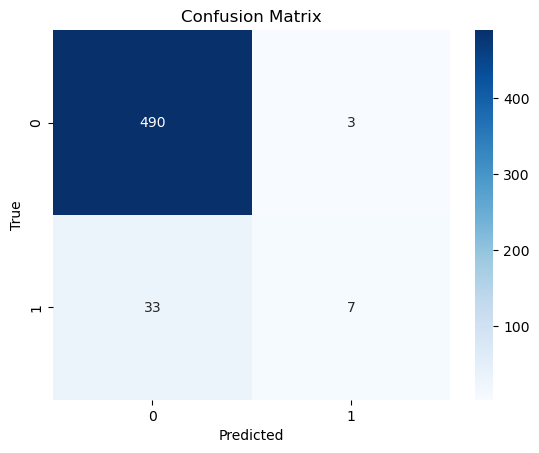

In [110]:
matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()